# Hausaufgabe 2
## Ablassung eines Stausees
<!-- Lizensiert unter (CC BY 2.0) Gert Herold, 2019 -->

Wegen Reparaturarbeiten an der Staumauer einer Talsperre soll das Wasser abgelassen werden. Der See habe ein Fassungsvermögen von $215 \cdot 10^6\,\text{m}^3$. Die Oberfläche des Stausees erstrecke sich über $10\,\text{km}^2$. Der Wasserauslass auf Grundhöhe habe einen Querschnitt von $2\,\text{m}^2$. Der Fluss selbst werde so umgeleitet, dass kein Wasser in den See nachfließen kann.

**1) Es werde angenommen, die Form des Sees lasse sich mit einem umgedrehten [Kegel](https://de.wikipedia.org/wiki/Kegel_(Geometrie)) annähern. Wie tief ist dann der See?** 

In [1]:
A0=10**7 
V0=215*10**6
h1=3*V0/A0
h1

64.5

Vereinfachend werde angenommen, dass die sich ausbildende Strömung sich mithilfe der [Bernoulli-Gleichung](https://de.wikipedia.org/wiki/Bernoulli-Gleichung) beschreiben lasse:

$$
\frac{u^2}{2}+\frac{p}{\rho}+g \, z = \text{const}
$$

Dabei beschreibt $u$ die Strömungsgeschwindigkeit des Fluids an einer beliebigen betrachteten Stelle, $p$ den hydrodynamischen Druck, $\rho$ die Dichte und $z$ die Höhe. $g=9{,}81\frac{\text{m}}{\text{s}^2}$ ist die Erdbeschleunigung. Werden nur die Seeoberfläche und der Ausfluss betrachtet, so kann der Druck $p$ ebenfalls als konstant angenommen werden, da er dem Umgebungsdruck entspricht. Ebenso wird die Dichte als konstant angenommen, und die obige Gleichung vereinfacht sich zu 

$$
\frac{u^2}{2}+g \, z = \text{const}
$$

bzw. für oben und unten:

$$
\frac{u_\text{oben}^2}{2}+g \, z_\text{oben} = \frac{u_\text{unten}^2}{2}+g \, z_\text{unten}
$$

**2) Berechnen Sie die sich anfangs ausbildende Strömungsgeschwindigkeit am Ausfluss $u_\text{unten,0}$ sowie den Volumenstrom $\dot{V_0}$ unter der Annahme, dass die Bewegung der Seeoberfläche vernachlässigbar ist.**

In [2]:
# Hier eigenen Code schreiben ...
import numpy as np
u_oben=0
z_unter=0
z_oben=h1
g=9.81
u_unter=np.sqrt(2*g*z_oben)
print('u_unter=',u_unter)

u_unter= 35.57372625969902


In [3]:
A1=2
Vol_0=u_unter*A1
Vol_0

71.14745251939804

Tipp: Um die Kreiszahl $\pi$ unter Python verwenden zu können, muss man sie entweder selbst definieren oder z.B. aus dem [NumPy-Modul](https://numpy.org/) importieren. Für ein Beispiel den folgenden Code-Abschnitt öffnen.

In [6]:
# Importiere pi aus numpy
from numpy import pi

# Berechne den "Radius" der Seeoberfläche
A0=10**7
r0 = (A0/pi)**0.5
print(f'Radius: {r0/1000:.2f} km')

Radius: 1.78 km


In [7]:
from numpy import pi

# Berechne den "Radius" der Seeoberfläche
A0=10
r0 = (A0/pi)**0.5
print(f'Radius: {r0:.2f} km')

Radius: 1.78 km


**3) Schreiben Sie eine Funktion, die die Tiefe des "Kegel"-Sees allgemein abhängig von der enthaltenen Wassermenge bestimmt.**

In [9]:
def tiefe(V):
    h=(3*V/(pi*(r0/h1)**2))**(1/3)
    return h
tiefe(115e6)

5235.757314433688

In [10]:
def tiefe(V):
    h=((V/V0)*((h1)**3))**(1/3)
    return h
tiefe(115e6)

52.3575731443369

**4) Schreiben Sie eine Funktion, die ausgehend von einem Startvolumen $V_0$ und einer gegebenen Zeitschrittweite $\Delta t$ den diskreten Zeitverlauf der Wassertiefe $h(t)$ bis zur Leerung des Sees zurückgibt. Beachten Sie, dass sich auch der Volumenstrom zeitlich ändert.** *(Hinweis: Die Änderung des Volumens lässt sich annähernd über $V_{n+1}=V_n-\dot{V_n} \cdot \Delta t$ beschreiben.)*

In [11]:
def abfluss(V0, dt):
    V0=215*10**6
    g=9.8
    A1=2
    h1=64.5
    V=V0
    h_list=[h1]
    #n=0
    
    while  V>0:
        u=np.sqrt(2*g*h_list[-1])
        Vol=A1*u
        
        V=(V-Vol*dt)
        #n+=1
        h_list.append(tiefe(V))
   
    n=len(h_list)
    t_list=[i*dt for i in range(0,n)]
    
    return t_list, h_list


**5) Wie lange dauert es, bis der Stausee komplett abgelassen wurde? Plotten Sie den Zeitverlauf der Wassertiefe bis zur Leerung für zwei Zeitschrittweiten:**
  * $\Delta t_1$ = 1 Minute
  * $\Delta t_2$ = 4 Tage

**Diskutieren Sie Auffälligkeiten.**

/Users/shiyaozhao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


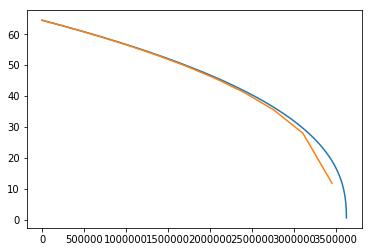

In [12]:
%matplotlib inline
from matplotlib.pyplot import plot, show

det_t1=abfluss(215*10**6,60)
plot(det_t1[0],det_t1[1])
det_t2=abfluss(215*10**6,60*60*24*4)
plot(det_t2[0],det_t2[1])


show()


**6) Wiederholen Sie Aufgabenteil 5) unter der Annahme, dass der See bei gleichem Volumen und gleicher Oberfläche annähernd durch einen *Zylinder* beschrieben wird. Vermeiden Sie soweit wie möglich redundanten Code.**

In [69]:
h = V0/A0
print(h)

21.5


In [70]:
def tiefe(V):
    h = V/A0
    return h


In [76]:
def abfluss(V0, dt):
    V0=215*10**6
    g=9.8
    A1=2
    h1=21.5
    V=[V0]
    h_list=[h1]
    
    n=0
    
    while  V[n]>=0:
        u=np.sqrt(2*g*tiefe(V[n]))
        Vol=A1*u
        
        V.append(V[n]-Vol*dt)
        
        n+=1
        h_list.append(tiefe(V[n]))
   
    n=len(h_list)
    t_list=[i*dt for i in range(0,n)]
    
    #m=t_list[-1]
    #mm=m/(60*60*24)
    #print(mm)
    return t_list, h_list

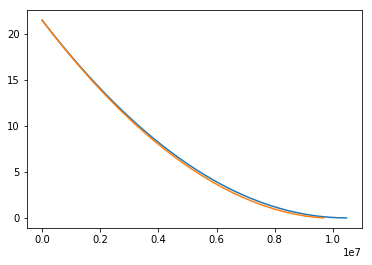

In [77]:
det_t1=abfluss(215000000,60)
plot(det_t1[0],det_t1[1])
det_t2=abfluss(215000000,60*60*24*4)
plot(det_t2[0],det_t2[1])
show()